# 1.Importing Libraries and Data
First, we will import libraries that contain the commands we need for feature engineering and creating a Random Forest model. Then we will import the 
data into dataframes.

In [2]:
# Import libraries.

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(color_codes = True)

# Used to calculate accuracy, precision, recall, and confusion matrix.

from sklearn import metrics

# Used to create training and test data.

from sklearn.model_selection import train_test_split

# Used to create a random forest model.

from sklearn.ensemble import RandomForestClassifier

# Used to create plot trees to visualize each random forest decision tree.

from sklearn.tree import plot_tree

In [42]:
pd.options.display.max_columns = None

In [4]:
# Use the pd.read_csv() to import a csv file into Jupyter notebook.
# Some values in the csv file contain characters not in UTF-8.
# Use encoding = "ISO-8859-1" to include those characters.

df = pd.read_csv(r'C:/Users/jwebe/OneDrive/Desktop/customer_booking.csv', encoding = "ISO-8859-1")
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [5]:
# Use the .info() command to see how many non null values are in each column and the data type of each column.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

Based on the table above, **the data contains 50000 entries. All columns contain 50000 non null entries, so there are no missing values to replace. All columns also contain the proper data types.** Columns that contain object data type can only contain non numeric (categorical) data. Columns that contain int64 data type can only contain whole number data. Columns that contain float64 data type can only contain decimal number data.

# 2. Feature Engineering
**Feature engineering is the process of selecting, manipulating and transforming raw data into new features (attributes or columns) that can be used in machine learning. Machine learning models are not capable of using categorical (non numeric) data as inputs.** The table above shows 5 columns with categorical data: sales_channel, trip_type, flight_day, route, and booking_origin.

**Label encoding is a process of converting categorical data into numeric data by replacing categorical data wih numbers.** The flight_day column contains the days of the week in a non numeric format: Mon, Tue, Wed, Thy, Fri, Sat, and Sun. **Categorical data with a specific order or hierarchy, such as days of the week, is called ordinal data.** Since days of the week have a specific order, we can replace Mon with the value of 1, Tue with the value of 2, and so on.

In [8]:
# Categorical values need to be converted into numerical values.
# Days of the week are in a specific order, so each day can be converted into a number 1-7.
# Use the .unique() command to get an array of all the unique values in a column.

df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [9]:
# Create a dictionary that converts a day of the week into a number.

mapping = {'Mon': 1, 
           'Tue': 2,
           'Wed': 3, 
           'Thu': 4, 
           'Fri': 5, 
           'Sat': 6, 
           'Sun': 7}

# Use the .map() command to map a dictionary to a column.

df['flight_day'] = df['flight_day'].map(mapping)

The sales_channel and trip_type columns contain categorical data that needs to be converted to numeric data. **Sales channel and trip type data are also nominal data. Unlike ordinal data, nominal data do not have an order or hierarchy. Rather than using label encoding, it is better to create dummy variables for sales channel and trip type data.**

With label encoding, we replace categorical data with numbers. By doing so, we imply that certain data are more closely related to other data. For example, Thu (labeled as 4) is more closely related to Wed or Fri (labeled as 3 and 5) and less closely related to Mon or Sun (labeled as 1 and 7). This makes sense if the data has an order or hierarchy (ordinal data).

Nominal data do not have a specific order or hierachy, and label encoding may create relationships between data where there aren't any. One way to convert nominal data is to create dummy variables. **When we create dummy variables, we create a new column for each unique value in a column.** The sales_channel column will create 2 new columns: sales_channel_internet and sales_channel_mobile. The trip_type column will create 3 new columns: trip_type_CircleTrip, trip_type_OneWay, and trip_type_RoundTrip.

**Each dummy variable column will either contain a 1 or 0. A value of 1 indicates that a data point contains that attribute and a value of 0 indicate that a data point does not contain that attribute.** If a customer purchased a round trip flight via the internet, the dummy variable columns trip_type_RoundTrip and sales_channel_internet will contain 1 and the remaining dummy variable columns will contain 0.

In [11]:
# Use the .unique() command to get an array of all the unique values in a column.

df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [12]:
# The sales_channel data needs to be converted into numeric data.
# Since sales_channel do not have a particular order or heirarchy, dummy variables are needed.
# Use the pd.get_dummies() command to create dummy variables for sales_channel.

df_dummy_sales_channel = 'sales_channel_' + df['sales_channel']
df_dummy_sales_channel = pd.get_dummies(df_dummy_sales_channel)

# Use the .astype() command to convert Boolean data type into int data type.

df_dummy_sales_channel = df_dummy_sales_channel.astype(int)

# Replace the original sales_channel column with the 2 dummy variable columns.
# Use the .drop() command to drop the sales_channel column.

df = df.drop(columns = 'sales_channel')

# Use the .insert() command to insert a column from one dataframe into another.

df.insert(1, 'sales_channel_Internet', df_dummy_sales_channel.loc[:, 'sales_channel_Internet'])
df.insert(2, 'sales_channel_Mobile', df_dummy_sales_channel.loc[:, 'sales_channel_Mobile'])

In [13]:
# Use the .unique() command to get an array of all the unique values in a column.

df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [14]:
# The trip_type data needs to be converted into numeric data.

df_dummy_trip_type = 'trip_type_' + df['trip_type']
df_dummy_trip_type = pd.get_dummies(df_dummy_trip_type)
df_dummy_trip_type = df_dummy_trip_type.astype(int)

# Replace the original trip_type column with the 3 dummy variable columns.

df = df.drop(columns = 'trip_type')

df.insert(3, 'trip_type_CircleTrip', df_dummy_trip_type.loc[:, 'trip_type_CircleTrip'])
df.insert(4, 'trip_type_OneWay', df_dummy_trip_type.loc[:, 'trip_type_OneWay'])
df.insert(5, 'trip_type_RoundTrip', df_dummy_trip_type.loc[:, 'trip_type_RoundTrip'])

The booking_origin column contains categorical, nominal data. We will see how many unique values the bookin_origin column contains.

In [16]:
# Use the .unique() command to see the unique values in the booking_origin column.

df['booking_origin'].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

The booking_origin columns contain 103 unique values. **We cannot create dummy variables for all unique values in the booking_origins column. This will add over 100 new columns to the data which will decrease the machine learning model's efficiency and effectiveness.**

**Rather than creating a dummy variable for all unique values, we will group these values into regions. Then we will create dummy variables for each region.** The uniques values can be grouped into 11 different regions: North America, South America, Europe, Nordic, East Asia, South Asia, South East Asia, Middle East, Africa, Oceania, and Caribbean. Values that are labeled (not set) will be placed in an "Unknown" group.

In [18]:
# Use the .replace() command to replace the booking origin countries with a region.

df['booking_origin'] = df['booking_origin'].replace(['United States', 'Mexico', 'Canada'], 
                                                     'North America')

df['booking_origin'] = df['booking_origin'].replace(['Brazil', 'Argentina', 'Chile', 'Colombia', 'Paraguay', 'Peru'], 
                                                     'South America')

df['booking_origin'] = df['booking_origin'].replace(['United Kingdom', 'Switzerland', 'Poland', 'Estonia', 'Belgium', 'France', 
                                                     'Hungary', 'Netherlands', 'Germany', 'Bulgaria', 'Spain', 'Czechia', 
                                                     'Austria', 'Slovenia', 'Romania', 'Italy', 'Greece', 'Croatia', 
                                                     'Malta', 'Portugal', 'Slovakia', 'Russia', 'Ireland', 'Ukraine', 
                                                     'Belarus', 'Cyprus', 'Turkey', 'Kazakhstan', 'Czech Republic', 'Gibraltar'], 
                                                     'Europe')

df['booking_origin'] = df['booking_origin'].replace(['Denmark', 'Norway', 'Sweden', 'Finland', 'Svalbard & Jan Mayen'], 
                                                     'Nordic')

df['booking_origin'] = df['booking_origin'].replace(['China', 'Japan', 'South Korea', 'Mongolia', 'Hong Kong', 'Taiwan', 'Macau'], 
                                                     'East Asia')

df['booking_origin'] = df['booking_origin'].replace(['India', 'Pakistan', 'Maldives', 'Nepal', 'Sri Lanka', 'Afghanistan', 'Bangladesh', 'Bhutan'], 
                                                     'South Asia')

df['booking_origin'] = df['booking_origin'].replace(['Brunei', 'Myanmar (Burma)', 'Cambodia', 'Timor-Leste', 'Indonesia', 'Laos', 
                                                     'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'], 
                                                     'South East Asia')

df['booking_origin'] = df['booking_origin'].replace(['Iran', 'Israel', 'Saudi Arabia', 'Lebanon', 'United Arab Emirates', 'Jordan', 'Iraq', 
                                                     'Kuwait', 'Bahrain', 'Oman', 'Qatar', 'Egypt', 'Tunisia'], 
                                                     'Middle East')

df['booking_origin'] = df['booking_origin'].replace(['Algeria', 'Kenya', 'Tanzania', 'South Africa', 'Réunion', 'Mauritius', 'Seychelles', 'Ghana'], 
                                                     'Africa')

df['booking_origin'] = df['booking_origin'].replace(['Australia', 'New Zealand', 'Papua New Guinea', 'Solomon Islands', 'Tonga', 
                                                     'New Caledonia', 'Norfolk Island', 'Guam', 'Vanuatu'], 
                                                     'Oceania')

df['booking_origin'] = df['booking_origin'].replace(['Nicaragua', 'Guatemala', 'Panama'], 
                                                     'Caribbean')

df['booking_origin'] = df['booking_origin'].replace(['(not set)'], 
                                                     'Unknown')

Now that we have **reduced the number of unique values in the booking_origin column from 103 unique values to 12 unique values**, we will create dummy variables for each unique value.

In [20]:
# The trip_type data needs to be converted into numeric data.

df_dummy_booking_origin = 'booking_origin_' + df['booking_origin']
df_dummy_booking_origin = pd.get_dummies(df_dummy_booking_origin)
df_dummy_booking_origin = df_dummy_booking_origin.astype(int)

# Replace the original trip_type column with the 13 dummy variable columns.

df = df.drop(columns = 'booking_origin')

df.insert(10, 'booking_origin_North America', df_dummy_booking_origin.loc[:, 'booking_origin_North America'])
df.insert(11, 'booking_origin_South America', df_dummy_booking_origin.loc[:, 'booking_origin_South America'])
df.insert(12, 'booking_origin_Europe', df_dummy_booking_origin.loc[:, 'booking_origin_Europe'])
df.insert(13, 'booking_origin_Nordic', df_dummy_booking_origin.loc[:, 'booking_origin_Nordic'])
df.insert(14, 'booking_origin_East Asia', df_dummy_booking_origin.loc[:, 'booking_origin_East Asia'])
df.insert(15, 'booking_origin_South Asia', df_dummy_booking_origin.loc[:, 'booking_origin_South Asia'])
df.insert(16, 'booking_origin_South East Asia', df_dummy_booking_origin.loc[:, 'booking_origin_South East Asia'])
df.insert(17, 'booking_origin_Middle East', df_dummy_booking_origin.loc[:, 'booking_origin_Middle East'])
df.insert(18, 'booking_origin_Africa', df_dummy_booking_origin.loc[:, 'booking_origin_Africa'])
df.insert(19, 'booking_origin_Oceania', df_dummy_booking_origin.loc[:, 'booking_origin_Oceania'])
df.insert(20, 'booking_origin_Caribbean', df_dummy_booking_origin.loc[:, 'booking_origin_Caribbean'])
df.insert(21, 'booking_origin_Unknown', df_dummy_booking_origin.loc[:, 'booking_origin_Unknown'])

The last column that contains non numeric, categorical data is the route column. Similar to the booking_origin column, the route column contains over 100 unique values. However, there are no obvious categories that we can group the routes. **Since booking_origins provide information on customer's location, we will remove the route column to reduce redundancy.**

In [22]:
# Use the .unique() command to see the unique values in the booking_origin column.

df['route'].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [23]:
# Use the .drop() command to delete a column.

df = df.drop(columns = 'route')

In [24]:
df.head()

num_passengers  sales_channel_Internet  sales_channel_Mobile  \
0               2                       1                     0   
1               1                       1                     0   
2               2                       1                     0   
3               1                       1                     0   
4               2                       1                     0   

   trip_type_CircleTrip  trip_type_OneWay  trip_type_RoundTrip  purchase_lead  \
0                     0                 0                    1            262   
1                     0                 0                    1            112   
2                     0                 0                    1            243   
3                     0                 0                    1             96   
4                     0                 0                    1             68   

   length_of_stay  flight_hour  flight_day  booking_origin_North America  \
0              19            7           6                             0   
1              20            3           6                             0   
2              22           17           3                             0   
3              31            4           6                             0   
4              22           15           3                             0   

   booking_origin_South America  booking_origin_Europe  booking_origin_Nordic  \
0                             0                      0                      0   
1                             0                      0                      0   
2                             0                      0                      0   
3                             0                      0                      0   
4                             0                      0                      0   

   booking_origin_East Asia  booking_origin_South Asia  \
0                         0                          0   
1                         0                          0   
2                         0                          1   
3                         0                          0   
4                         0                          1   

   booking_origin_South East Asia  booking_origin_Middle East  \
0                               0                           0   
1                               0                           0   
2                               0                           0   
3                               0                           0   
4                               0                           0   

   booking_origin_Africa  booking_origin_Oceania  booking_origin_Caribbean  \
0                      0                       1                         0   
1                      0                       1                         0   
2                      0                       0                         0   
3                      0                       1                         0   
4                      0                       0                         0   

   booking_origin_Unknown  wants_extra_baggage  wants_preferred_seat  \
0                       0                    1                     0   
1                       0                    0                     0   
2                       0                    1                     1   
3                       0                    0                     0   
4                       0                    1                     0   

   wants_in_flight_meals  flight_duration  booking_complete  
0                      0             5.52                 0  
1                      0             5.52                 0  
2                      0             5.52                 0  
3                      1             5.52                 0  
4                      1             5.52                 0

# 3. Data Modeling
Data modeling is the process of converting raw data into insight using algorithms and other systems of equations. **The machine learning model that we will use to predict whether a customer will book a flight is the Random Forest model.** The Random Forest model is an algorithm that combines the output of multiple decision trees to reach a single decision.

## 3a. Model Sampling
Random Forest model is a supervised learning algorithm. **Supervised learning algorithms requires training data to create the model. Once the model is created using the training data, the model is compared with the test data to determine if the model is overfitting, underfitting, or has good fit.**

The first thing we need to do is to split our dataset into training and test data. Since both training and test data come from the same dataset, they should follow the same pattern even if the data in both sets are different. **By creating a model using the training data and testing the model using the test data, we can determine how well the model can predict the pattern within the data.**

In [27]:
# Make a copy of our data.
# It's a good idea to keep the original data intact in case you need the data in the original dataframe.
# Use the .copy() command to create a copy of the data.

df = df.copy()

# Separate target variable from independent variables.
# The target variable is the variable you are trying to predict (booking_complete).
# The independant variables are the varibales you will use to predict the target variable (all variables except booking_complete).

y = df['booking_complete']
X = df.drop(columns = ['booking_complete'])
print(X.shape)
print(y.shape)

(50000, 26)
(50000,)


In [28]:
# Create training and test data.
# The test size the is % of the original data that will be used for test data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37500, 26)
(37500,)
(12500, 26)
(12500,)


## 3b. Model Training
To train the model, we need to create a Random Forest model using the training data. **The model will use the training data, create decision trees, and will predict whether a customer will book a flight or not by finding and learning patterns within the training data.**

In [30]:
# Use the RandomForestClassifier() command to create a random forest model.

model = RandomForestClassifier(n_estimators = 1000, 
                               random_state = 42)

# Use the .fit() command to fit the data into the model.
# The data that we will fit into the model will be the training data, both x_train and y_train.

fitted = model.fit(X_train, y_train)

## 3c. Model Testing
Now that we trained the Random Forest model, we will use the test data to test the model. **We test the model by using the test data as inputs for the Random Forest model. We will then use a confusion matrix to determine the accuracy, precision, and recall for the model.**

In [32]:
     # Use the .predict() command to labels of the data values on the basis of the trained model.
# Use the test data (X_test) as input.

predictions = fitted.predict(X_test)

# Use the metrics.confusion() command to compute confusion matrix to evaluate the accuracy of a classification.
# Use the y_test variable as the true values.
# Use predictions as the predicted values.
# Use the .ravel() command to merge multiple arrays (tn, fp, fn, tp) to a single array.

tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [33]:
# Use the .value_counts() commant to count the number of different values in y_test.

y_test.value_counts()

booking_complete
0    10648
1     1852
Name: count, dtype: int64

In [34]:
## Use the print() command to print out the results of the confusion matrix.

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall (Sensitivity): {metrics.recall_score(y_test, predictions)}")
print(f"F1: {metrics.f1_score(y_test, predictions)}")

True positives: 199
False positives: 213
True negatives: 10435
False negatives: 1653

Accuracy: 0.85072
Precision: 0.4830097087378641
Recall (Sensitivity): 0.10745140388768898
F1: 0.17579505300353357


**True Positives (TP) are events where the model predicted a positive value (a customer will book a flight) and the data supports the model's prediction. False Positives (FP) are events where the model predicts a positive value but the data does not support the prediction.**

**Similarly, True Negatives (TN) are events where the model predicts a negative value (a cusotmer will not book a flight) and the data supports the prediction. False Negatives (FN) are events where the model predicts a negative value but the data does noot support the prediction.**

**Accuracy is the overall accuracy of the model.** It is calculated as TP + TN/TP + TN + FP + FN where TP + TN represents all the predictions that are correct and TP + TN + FP + FN represents all of the predictions.

**Precision is the ability of the model to accurately predict positive values.** It is calculated as TP/TP + FP where TP represents  the values that the model correctly predicts will have a positive value and TP + FP represents all the values that the model predicts will have a positive value, regardless of whether it is correct or incorrect.

**Recall is the ability of the model to accurately detect positive values.** It is calculated as TP/TP + FN where TP represents  the values that the model correctly predicts will have a positive value and TP + FN represents the actual number of positive values.

**F1 represents how well the model can detect and accurately predict positive values.** It is calculated as 2 * (Precision * Recall)/(Precision + Recall).

**Our model has a high accuracy score of 85.07%.** If the model predicts that a value will be positive (yes, a customer will book a flight) or negative (no, a customer will not book a flight), there is a 85.07% chance that the prediction is accurate.

**Our model also has a low precision score of 48.3%. While accuracy represents how well the model is able to predict both positive and negative values, precision represents how well the model is able to predict positive values.** The model has predicted 412 positive values and 199 of the predicted values are true. This indicates that if the model predicts that a value is positive, there is a 48.3% chance that prediction is accurate.

**However, our model has a very low recall score of 10.75%. Recall represents how well the model can detect positive values.** There are a total of 1852 positive values and the model was able to accurately predict 199 of them. This means that our model can only detect 10.75% of positive values.

**Our model also has a low F1 score of 17.58%. The F1 score represents how accurate the model is at predicting and detecting positive values.** A low F1 score indicates the model has issues with accurately predicting postive values either because its predictions tend to be wrong or because it frequently misidentifies positive values.

## 3d. Model Visualiziation
Now that we have created out Random Forest model, let's create visualizations so that we could better understand the model.

In [69]:
# Use the .predict() command to predict values using the values in the predictors variable.

predict_df = df[['booking_complete']]
predict_df['prediction'] = fitted.predict(X)

print(predict_df.iloc[150:155])

     booking_complete  prediction
150                 0           0
151                 0           0
152                 1           0
153                 0           0
154                 0           0


C:\Users\jwebe\AppData\Local\Temp\ipykernel_1932\2121691389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_df['prediction'] = fitted.predict(X)


The dataframe above is a sample of the predict_df dataframe. The predict_df dataframe shows whether the customer has booked a flight or not, and what our Random Forest model predicts. **In row 152, the customer has booked a flight but our model predicts that the customer has not.**

Next, we will create a visualization of one of the decision trees that makes up our Random Forest model. Our model is made up of one thousand decision trees.

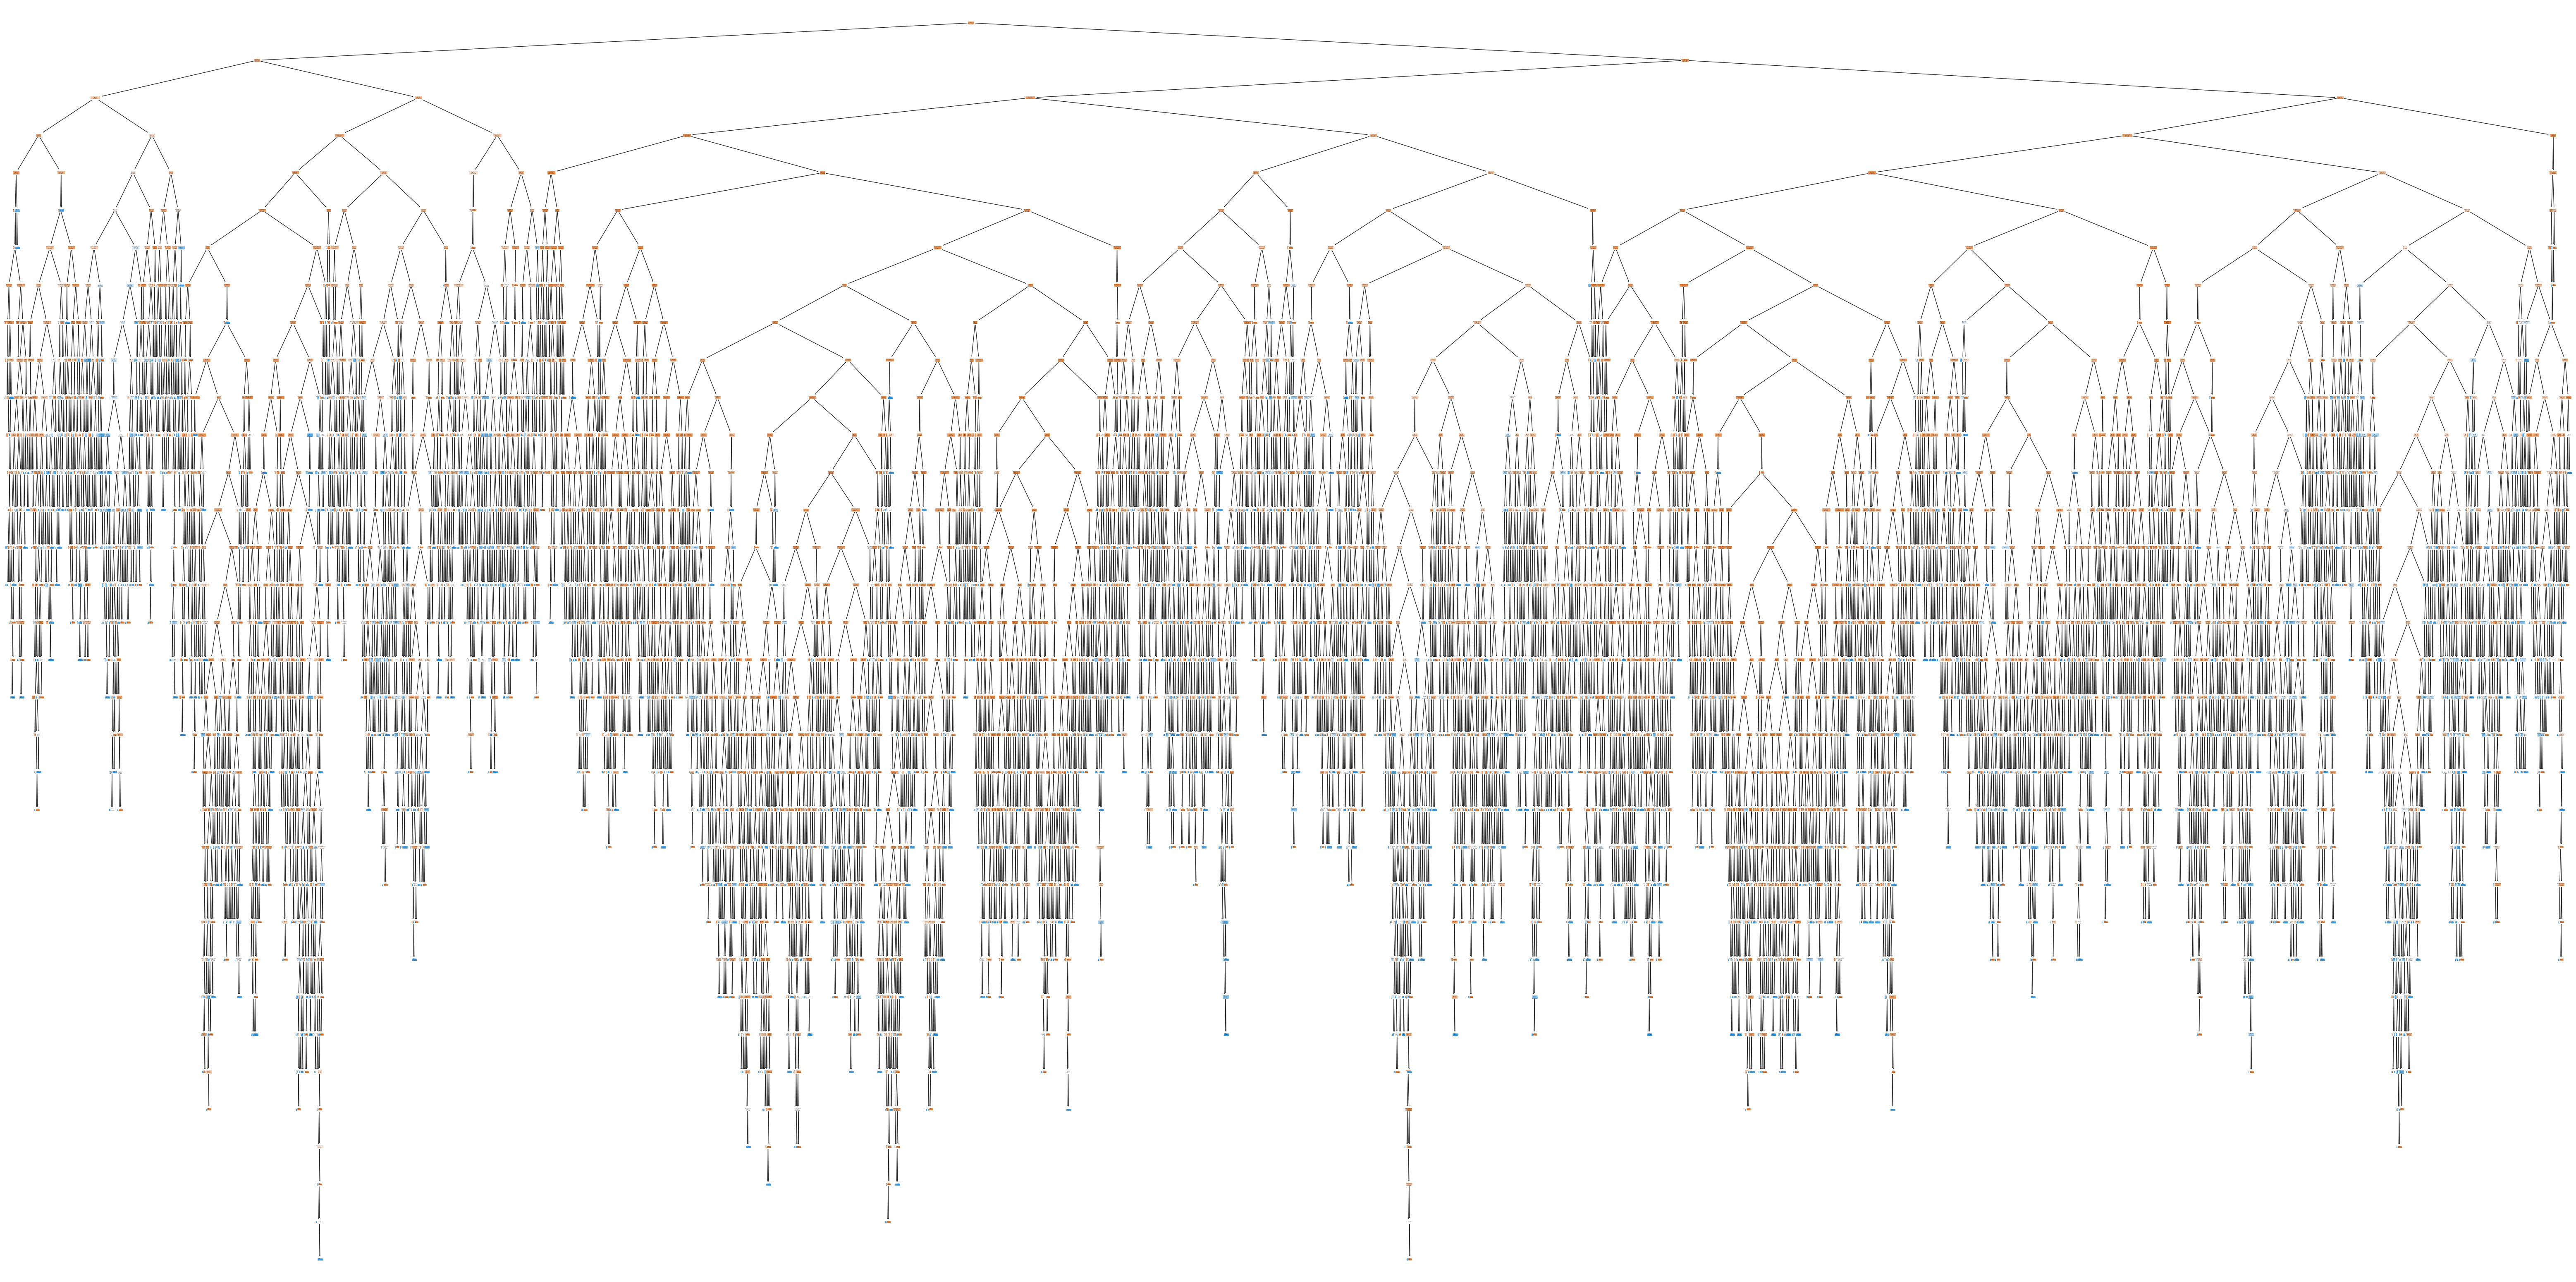

In [52]:
# Use the plot_tree() command to plot a decision tree.
# model.estimators[] is the tree you want to plot.
# feature_names is the name of the variables used to predict the independant variable.
# class_names is the name of the target classes.
# filled colors the nodes.

plt.figure(figsize = (80,40))
plot_tree(model.estimators_[0], feature_names = X.columns, class_names = ['Booked', 'Not_Booked'],filled = True);
plt.show()

## 3f. Feature Importance
The data that we fed to our Random Forest model contains many features (columns). **Some features have a bigger impact on how the Random Forest model make predictions.** We will determine which columns will have the greatest impact on the Random Forest model. A feature with an importance score of 1 indicates that only that feature is used to predict outcomes. A feature with an importance score of 0 indicates that the feature has no effect on the Random Forest model.

In [54]:
# Use the .feature_importances_ command to find the importance values of each feature.

fitted.feature_importances_

#Create an importance dataframe that displays the features and importance level.

feature_importance = pd.DataFrame({'Feature': X_train.columns, 
                                   'Importance': fitted.feature_importances_})

feature_importance.sort_values(by = 'Importance', 
                               ascending = False, 
                               inplace = True)

feature_importance

Feature  Importance
6                    purchase_lead    0.249958
8                      flight_hour    0.174410
7                   length_of_stay    0.155456
25                 flight_duration    0.112295
9                       flight_day    0.103353
0                   num_passengers    0.055324
16  booking_origin_South East Asia    0.045320
19          booking_origin_Oceania    0.022921
24           wants_in_flight_meals    0.020172
23            wants_preferred_seat    0.016165
22             wants_extra_baggage    0.015071
14        booking_origin_East Asia    0.009459
2             sales_channel_Mobile    0.004067
1           sales_channel_Internet    0.004055
15       booking_origin_South Asia    0.002768
10    booking_origin_North America    0.002090
12           booking_origin_Europe    0.001920
5              trip_type_RoundTrip    0.001040
17      booking_origin_Middle East    0.000980
4                 trip_type_OneWay    0.000809
13           booking_origin_Nordic    0.000745
21          booking_origin_Unknown    0.000644
18           booking_origin_Africa    0.000469
3             trip_type_CircleTrip    0.000393
11    booking_origin_South America    0.000106
20        booking_origin_Caribbean    0.000007

Let's create a bar chart showing the feature importance. To make the bar chart easier to read, let's arrange the bars in descending order based on importance.

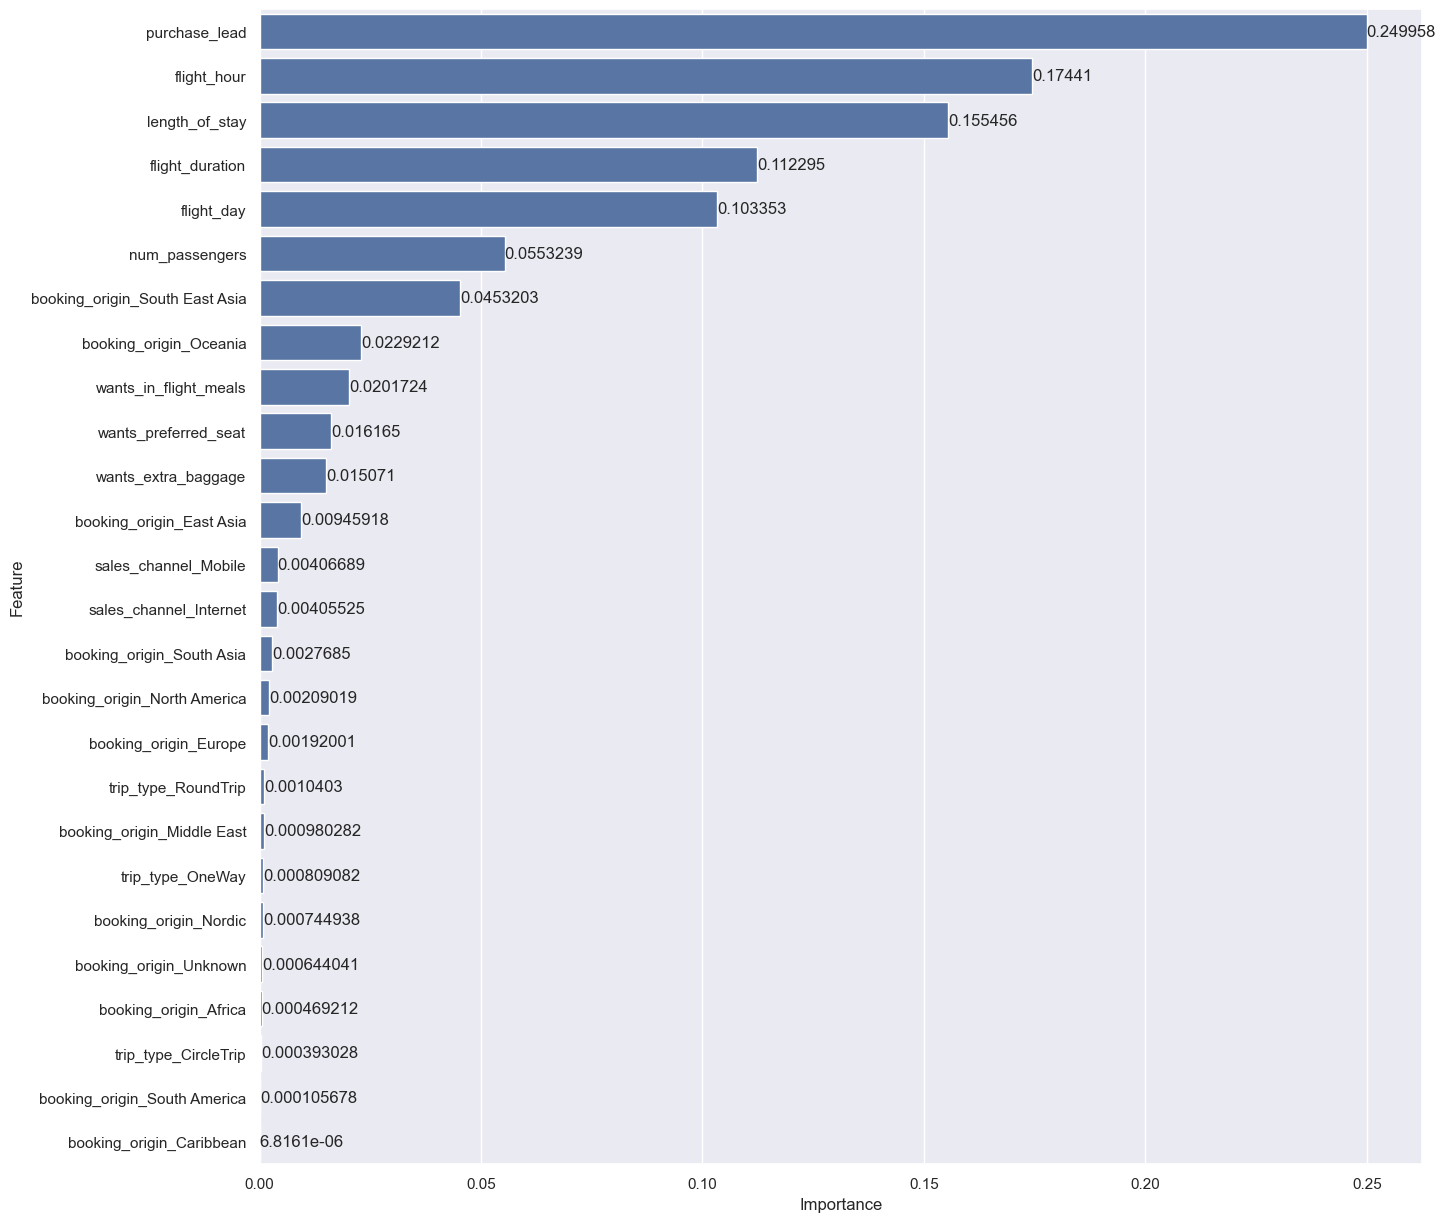

In [56]:
# Use the fig, ax = plt.subplots() command to create a set of subplots within one cell.
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Use the sns.barplot() command to create a bar plot.

sns.barplot(data = feature_importance, 
            x = 'Importance', 
            y = 'Feature')

ax.bar_label(ax.containers[0])

plt.show()

The greatest driver for customers who will book a flight is the number of days between travel date and booking date. This is followed by the hour of flight departure, number of days spent at their destination, the flight duration, and the day the flight orccurs.

The most important variables relate to the flight itself and time. Other variables such as booking origin, sales channels, number of passengers, and customer preferences (wants in flight meals, wants preferred seating) are not as important.

Customers who come from the South East Asia and Oceania regions tend to complete their booking more often than customers who come from other regions.